# New York Stock Exhange Predictions RNN-LSTM


### Dataset consists of following files:

##### prices.csv: raw, as-is daily prices. Most of data spans from 2010 to the end 2016, for companies new on stock market date range is shorter. There have been approx. 140 stock splits in that time, this set doesn't account for that.

##### prices-split-adjusted.csv: same as prices, but there have been added adjustments for splits.

##### securities.csv: general description of each company with division on sectors

#####  fundamentals.csv: metrics extracted from annual SEC 10K fillings (2012-2016), should be enough to derive most of popular fundamental indicators.

In [111]:
#importing important libraries
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import keras as ks

In [112]:
#calling the file in nyse named prices.csv
df =pd.read_csv("prices.csv", header=0)
df

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
17777,2010-02-26,HP,41.660000,40.520000,40.400002,41.700001,28021300.0
17778,2010-02-26,HPQ,50.919996,50.789998,50.610000,50.989997,24262000.0
17779,2010-02-26,HRB,17.260000,17.280001,16.700001,17.490000,4387000.0
17780,2010-02-26,HRL,41.330002,41.110001,40.950001,41.439999,2124400.0


In [113]:
#size of the dataset in 851264 rows and 7 columns
print(df.shape)

(17782, 7)


In [114]:
# takes 20 different and unique from symbol
df.symbol.unique()[0:20]

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN'], dtype=object)

In [115]:
# finind the length of column named symbol
print(len(df.symbol.values))

17782


In [116]:
#gives the details of each columns of the dataset like mean, max etc
df.describe()

,open,close,low,high,volume
count,17781.000000,17781.000000,17781.000000,17781.000000,1.778100e+04
mean,46.729260,46.721304,46.130523,47.247734,7.592091e+06
std,48.340664,48.226641,47.710201,48.780424,1.815214e+07
min,1.260000,1.270000,1.240000,1.300000,0.000000e+00
25%,24.230000,24.229998,23.870001,24.500000,1.535400e+06
50%,37.259998,37.299999,36.840000,37.730000,3.256200e+06
75%,54.099998,54.150002,53.500000,54.680000,6.977500e+06
max,627.181073,626.751061,624.241073,629.511067,5.512855e+08


In [117]:
#checking whether their is any null value in the dataset
# .sum() will give the total no. of null value column vise 
df.isnull().sum()

date      0
symbol    1
open      1
close     1
low       1
high      1
volume    1
dtype: int64

In [118]:
# taking all the unique or one time value in the date column 
df.date.unique()

array(['2016-01-05 00:00:00', '2016-01-06 00:00:00',
       '2016-01-07 00:00:00', '2016-01-08 00:00:00',
       '2016-01-11 00:00:00', '2016-01-12 00:00:00',
       '2016-01-13 00:00:00', '2016-01-14 00:00:00',
       '2016-01-15 00:00:00', '2016-01-19 00:00:00',
       '2016-01-20 00:00:00', '2016-01-21 00:00:00',
       '2016-01-22 00:00:00', '2016-01-25 00:00:00',
       '2016-01-26 00:00:00', '2016-01-27 00:00:00',
       '2016-01-28 00:00:00', '2016-01-29 00:00:00',
       '2016-02-01 00:00:00', '2016-02-02 00:00:00',
       '2016-02-03 00:00:00', '2016-02-04 00:00:00',
       '2016-02-05 00:00:00', '2016-02-08 00:00:00',
       '2016-02-09 00:00:00', '2016-02-10 00:00:00',
       '2016-02-11 00:00:00', '2016-02-12 00:00:00',
       '2016-02-16 00:00:00', '2016-02-17 00:00:00',
       '2016-02-18 00:00:00', '2016-02-19 00:00:00',
       '2016-02-22 00:00:00', '2016-02-23 00:00:00',
       '2016-02-24 00:00:00', '2016-02-25 00:00:00',
       '2016-02-26 00:00:00', '2016-02-29 00:0

In [119]:
#calling the file in nyse named securities.csv
comp_info = pd.read_csv('securities.csv')
comp_info

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",31-03-1964,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31-12-2012,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",31-08-2015,718877
...,...,...,...,...,...,...,...,...
500,YHOO,Yahoo Inc.,reports,Information Technology,Internet Software & Services,"Sunnyvale, California",NaN,1011006
501,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",06-10-1997,1041061
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",NaN,1136869
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",NaN,109380


In [ ]:
# taking total no. of unique values in column Ticket symbol
comp_info["Ticker symbol"].nunique()

505

In [ ]:
# for locating specific data here.... in security column of string that starts with "Face"
comp_info.loc[comp_info.Security.str.startswith('Face') , :]

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
181,FB,Facebook,reports,Information Technology,Internet Software & Services,"Menlo Park, California",23-12-2013,1326801


In [120]:
# here we locate Ticker symbol of company with security like Yahoo, Xerox, Adobe etc 
# then taking their no. of times entry and thier "Ticker symbol"
comp_plot = comp_info.loc[(comp_info["Security"] == 'Yahoo Inc.') | (comp_info["Security"] == 'Xerox Corp.') | (comp_info["Security"] == 'Adobe Systems Inc')
              | (comp_info["Security"] == 'Microsoft Corp.') | (comp_info["Security"] == 'Adobe Systems Inc') 
              | (comp_info["Security"] == 'Facebook') | (comp_info["Security"] == 'Goldman Sachs Group') , ["Ticker symbol"] ]["Ticker symbol"] 
print(comp_plot)

6      ADBE
181      FB
212      GS
306    MSFT
496     XRX
500    YHOO
Name: Ticker symbol, dtype: object


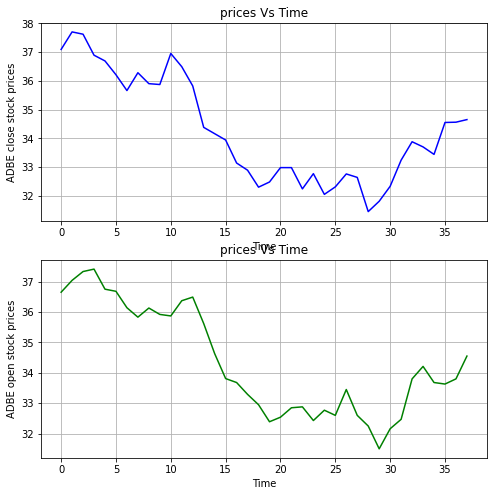

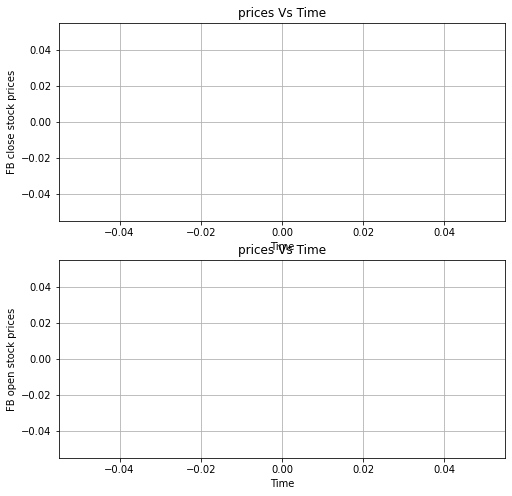

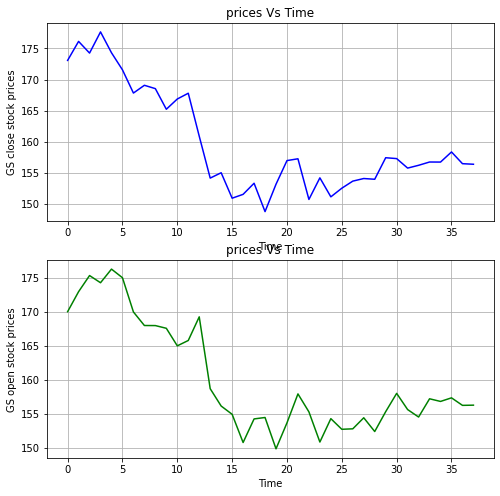

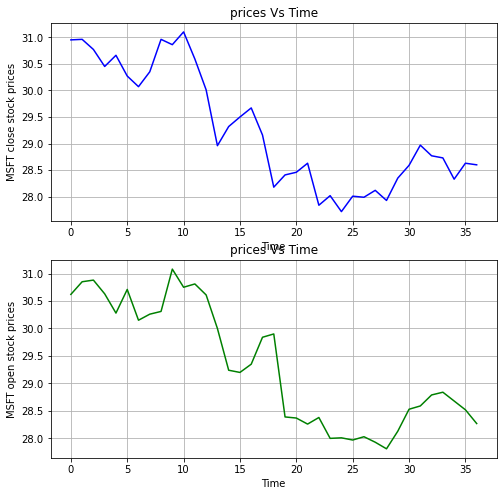

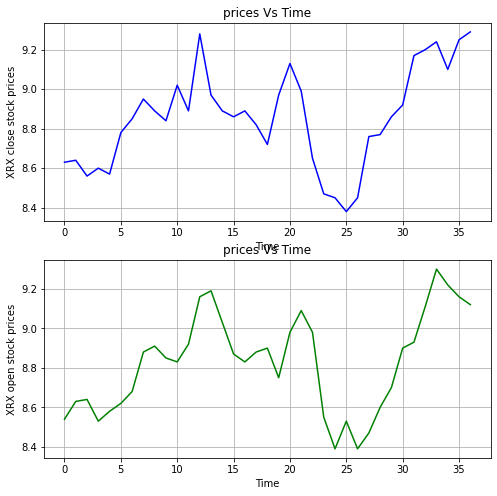

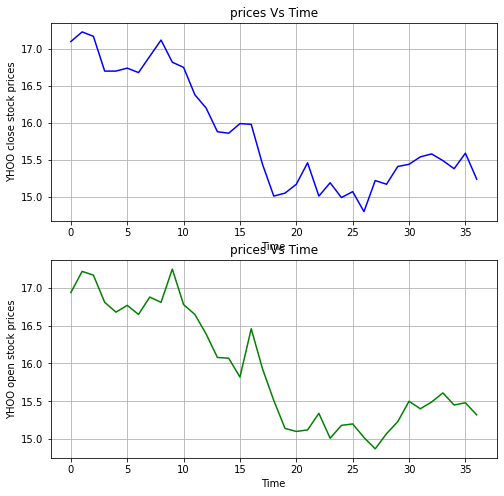

In [121]:
def plotter(code):
    
    global closing_stock ,opening_stock
    
    f, axs = plt.subplots(2,2,figsize=(8,8))
    
    plt.subplot(212)
    
    company = df[df['symbol']==code]
    
    company = company.open.values.astype('float32')
    
    company = company.reshape(-1, 1)
     
    opening_stock = company
    
    
    plt.grid(True)
    plt.xlabel('Time') 
    plt.ylabel(code + " open stock prices")
    plt.title('prices Vs Time')
    plt.plot(company , 'g') 
    
    
    plt.subplot(211)
    
    company_close = df[df['symbol']==code]
    
    company_close = company_close.close.values.astype('float32')
    
    company_close = company_close.reshape(-1, 1)
   
    closing_stock = company_close
    
    
    plt.xlabel('Time') 
    plt.ylabel(code + " close stock prices")
    plt.title('prices Vs Time') 
    plt.grid(True)
    plt.plot(company_close , 'b')
    plt.show() 

# calling the graphs through the function    
for i in comp_plot:
    plotter(i)

**Lets take a single stock as a sample to forecast further stock prices.**

In [ ]:
#taking the values of closing_stock in a single list
closing_stock[:,0]

array([17.1 , 17.23, 17.17, 16.7 , 16.7 , 16.74, 16.68, 16.9 , 17.12,
       16.82, 16.75, 16.38, 16.2 , 15.88, 15.86, 15.99, 15.98, 15.44,
       15.01, 15.05, 15.17, 15.46, 15.01, 15.19, 14.99, 15.07, 14.8 ,
       15.22, 15.17, 15.41, 15.44, 15.54, 15.58, 15.49, 15.38, 15.59,
       15.24], dtype=float32)

In [ ]:
#taking the values of closing_stock in a single list called stocks
stocks = closing_stock[: , 0]
print(stocks)
#reshaping the stocks in 1D array form
stocks = stocks.reshape(len(stocks) , 1)

[17.1  17.23 17.17 16.7  16.7  16.74 16.68 16.9  17.12 16.82 16.75 16.38
 16.2  15.88 15.86 15.99 15.98 15.44 15.01 15.05 15.17 15.46 15.01 15.19
 14.99 15.07 14.8  15.22 15.17 15.41 15.44 15.54 15.58 15.49 15.38 15.59
 15.24]


**Feature scaling the vector for better model performance.**

In [122]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) #scaling features between 0 and 1
stocks = scaler.fit_transform(stocks) # it will start learning algo and then provide scaled and dimension reduced output

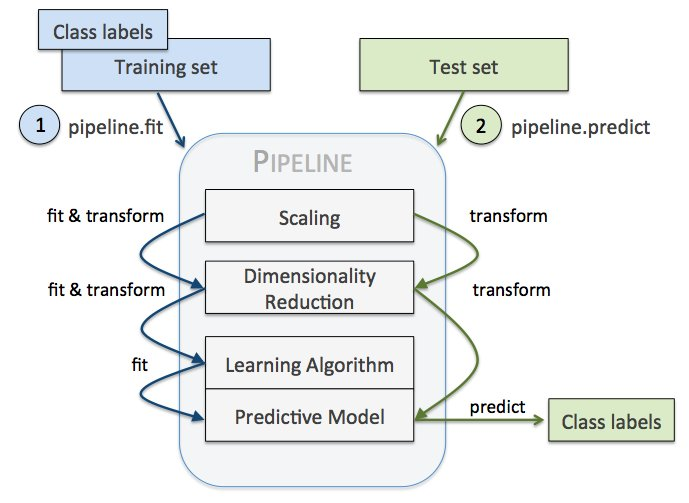

In [ ]:
# Fit transform image
from IPython.display import Image
Image(filename="fittrans.jpg")

In [ ]:
train = int(len(stocks) * 0.80) #creating sizes of train and taking 80% percentage of the part
test = len(stocks) - train #creating sizes of test as total minus train

In [ ]:
#sizes of train and test
print(train , test)

29 8


In [123]:
#divinding the values of stocks data to train from 0 to 1409 i.e 80% data
train = stocks[0:train]
print(train)

TypeError: ignored

In [124]:
#new train and test array shape
print(train.shape , test.shape)

AttributeError: ignored

In [125]:
#creating function to create trainX,testX and target(trainY, testY)
def process_data(data , n_features):
    dataX, dataY = [], [] 
    for i in range(len(data)-n_features-1):
        
        a = data[i:(i+n_features), 0]
        
        dataX.append(a) 
        
        dataY.append(data[i + n_features, 0])
        
    return np.array(dataX), np.array(dataY)

#so the stucture of trainX and trainY is somehow like this
# trainX=[[i1 , i2,...., i n_features ]] and trainY=[i + n_features]  
# trainY will show the future value of trainX values

In [126]:
n_features = 2

trainX, trainY = process_data(train, n_features)

testX, testY = process_data(test, n_features)

TypeError: ignored

In [127]:
# printing the structure of train X,Y and test X,Y
print(trainX.shape , trainY.shape , testX.shape , testY.shape)

(26, 2) (26,) (5, 1, 2) (5, 1)


In [ ]:
# reshaping trainX and testX to use in deeplearning model
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

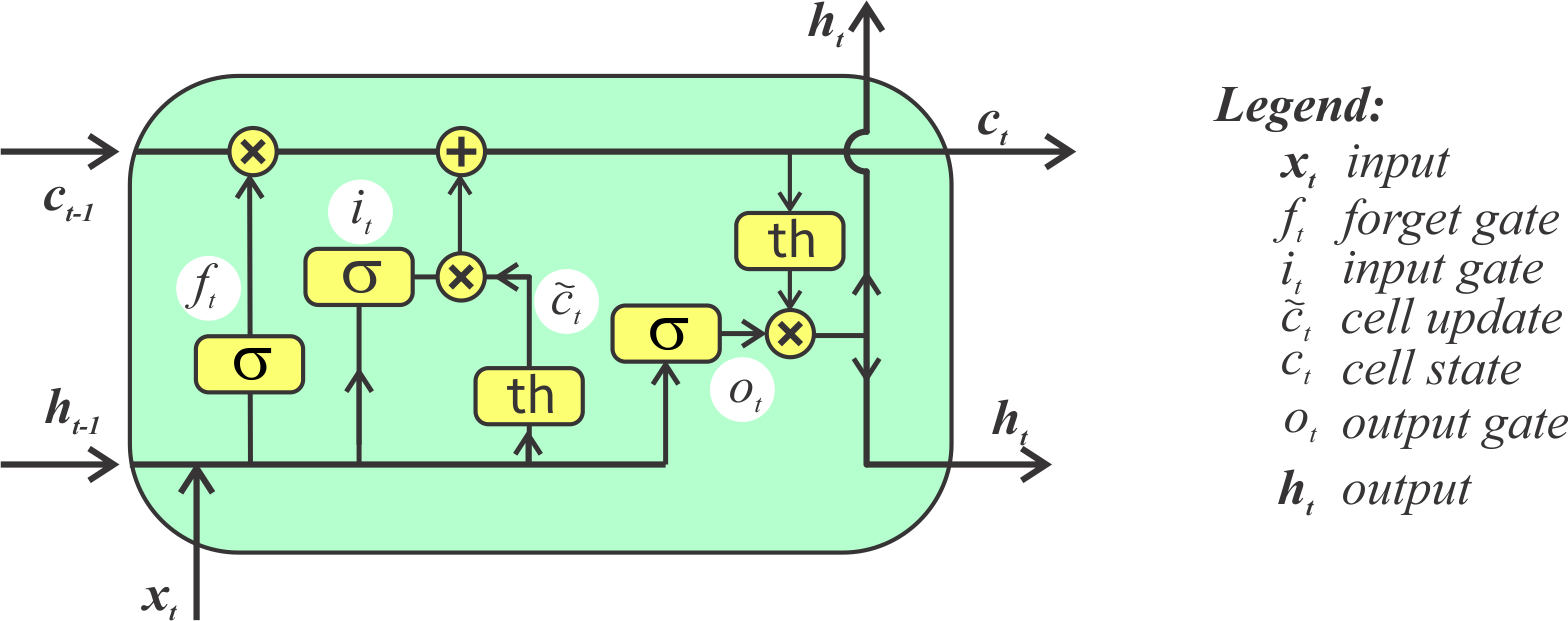

In [ ]:
# Image of LSTM RNN
from IPython.display import Image
Image(filename="Lstm.png")

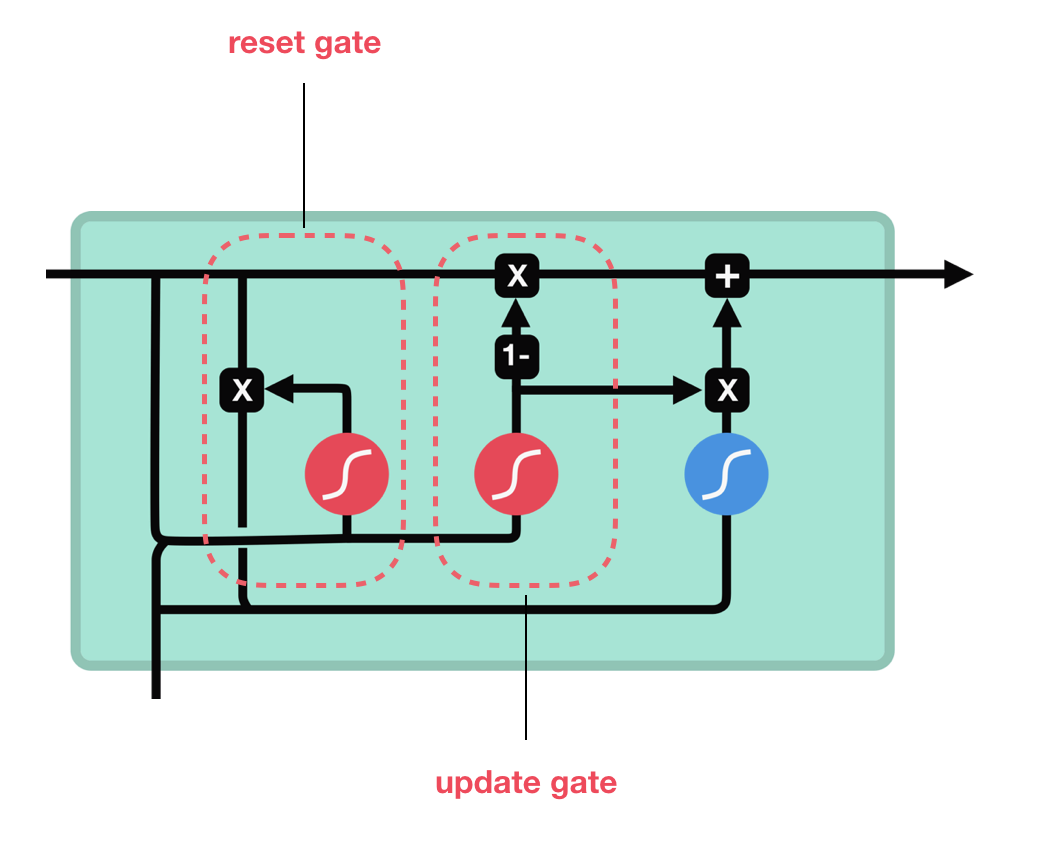

In [ ]:
# Image of GRU RNN
from IPython.display import Image
Image(filename="gru.png")

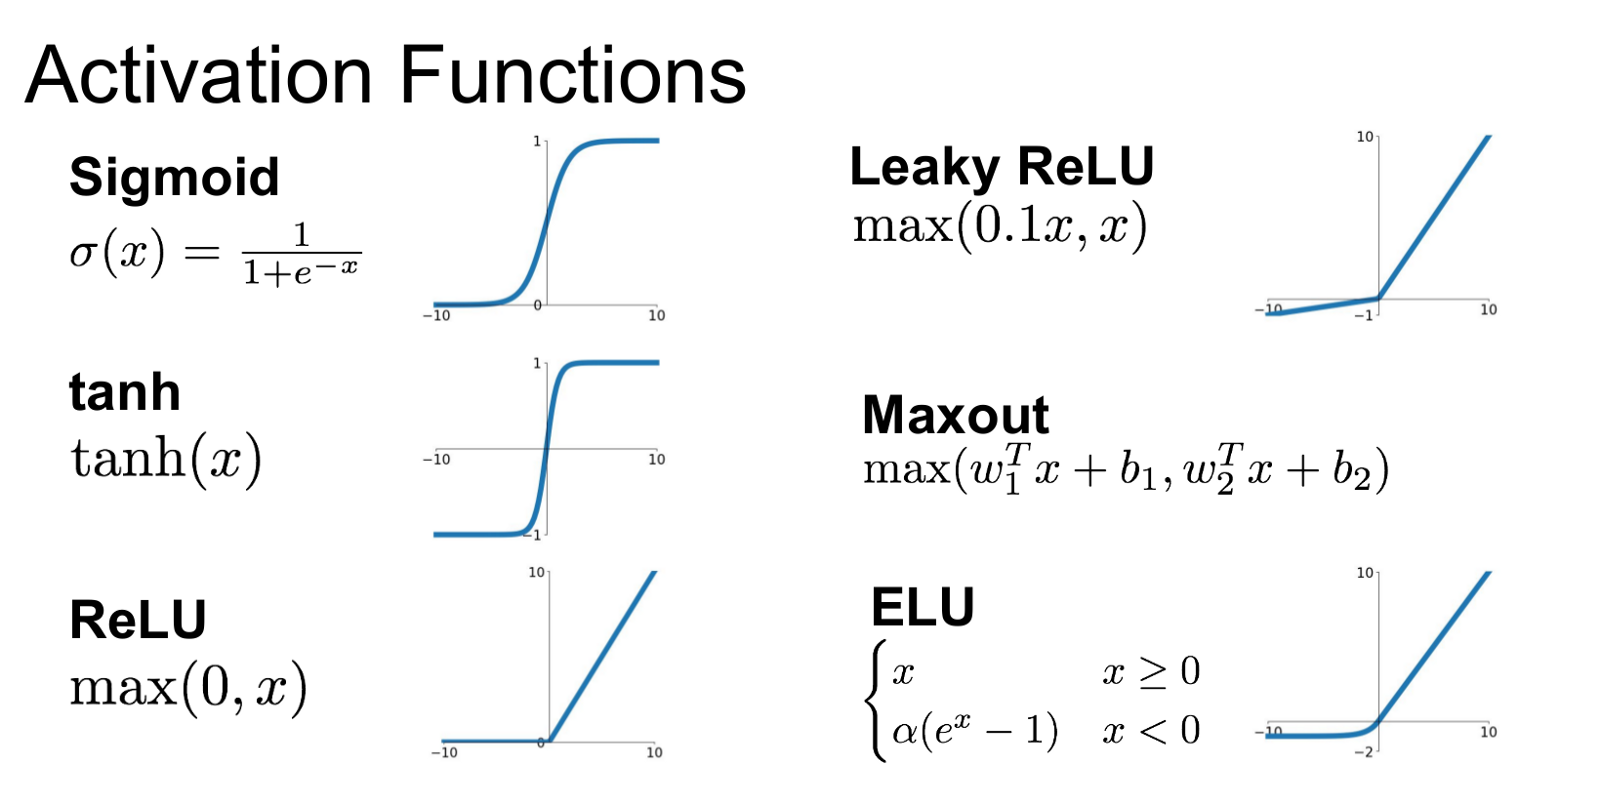

In [ ]:
# image of Activation
from IPython.display import Image
Image(filename="activation.png")

In [129]:
import math 
from keras.models import Sequential
from keras.layers import Dense , BatchNormalization , Dropout , Activation # types of layers
from keras.layers import LSTM , GRU 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error 
from tensorflow.keras.optimizers import Adam , SGD , RMSprop 

In [130]:
filepath="stock_weights1.hdf5"

from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')

In [131]:
# creating model for training data using sequential to give series wise output between layers
model = Sequential()

model.add(GRU(256 , input_shape = (1 , n_features) , return_sequences=True))

model.add(Dropout(0.4))

model.add(LSTM(256))

model.add(Dropout(0.4))

model.add(Dense(64 ,  activation = 'relu'))
model.add(Dense(1))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 1, 256)            199680    
                                                                 
 dropout_2 (Dropout)         (None, 1, 256)            0         
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 741,505
Trainable params: 741,505
Non-tr

In [ ]:
# selecting the loss measurement metrics and optimizer for our model , to find out mean square error
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# fitting the data i.e training the trainX, to relate to trainY
history = model.fit(trainX, trainY, epochs=100 , batch_size = 128 , 
          callbacks = [checkpoint , lr_reduce] , validation_data = (testX,testY))    
#callbacks are proper

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3195 - mean_squared_error: 0.3195
Epoch 1: val_loss improved from -inf to 0.08277, saving model to stock_weights1.hdf5
1/1 [==============================] - 6s 6s/step - loss: 0.3195 - mean_squared_error: 0.3195 - val_loss: 0.0828 - val_mean_squared_error: 0.0828 - lr: 5.0000e-04
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.3045 - mean_squared_error: 0.3045
Epoch 2: val_loss did not improve from 0.08277
1/1 [==============================] - 0s 55ms/step - loss: 0.3045 - mean_squared_error: 0.3045 - val_loss: 0.0785 - val_mean_squared_error: 0.0785 - lr: 5.0000e-04
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2936 - mean_squared_error: 0.2936
Epoch 3: val_loss did not improve from 0.08277
1/1 [==============================] - 0s 52ms/step - loss: 0.2936 - mean_squared_error: 0.2936 - val_loss: 0.0743 - val_mean_squared_error: 0.0743 - lr: 5.0000e-04
Epoch 4/100
1/1 [==

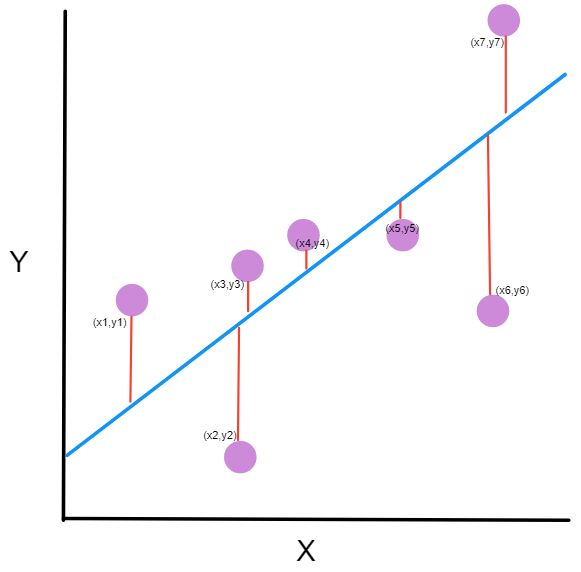

In [ ]:
# image of mean square error
from IPython.display import Image
Image(filename="meansquareerror.png")

In [132]:
#predicting the value for testX
pred = model.predict(testX)

pred = scaler.inverse_transform(pred)

pred[:10]
# taking pred from 1 to 10

array([[-0.00420821],
       [-0.00470986],
       [-0.00512366],
       [-0.00482652],
       [-0.00413138]], dtype=float32)

In [ ]:
# reshaping testY in single array
testY = testY.reshape(testY.shape[0] , 1)

testY = scaler.inverse_transform(testY)

testY[:10]

array([[52.56219 ],
       [52.65939 ],
       [52.44069 ],
       [52.17339 ],
       [52.683693]], dtype=float32)

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


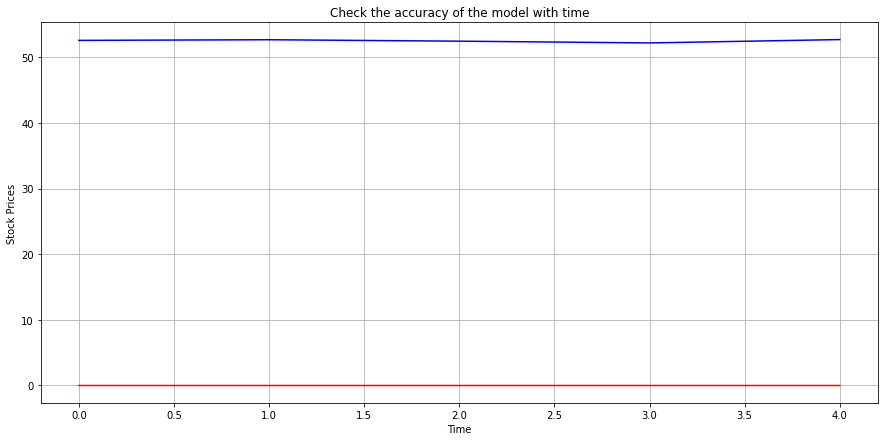

In [133]:
# ploting the graph of stock prices with time
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)

plt.plot(testY , 'b')

plt.plot(pred , 'r')

plt.xlabel('Time')

plt.ylabel('Stock Prices')

plt.title('Check the accuracy of the model with time')

plt.grid(True)

plt.show()